# Laboratorium 4


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import time
from typing import List, Tuple


In [2]:
INCH_TO_PIXEL = 96


### Zadanie 1 - problem komiwojażera 

Losowanie n punktów na płaszczyźnie

In [4]:
def random_points(a, b, n, switch):
    """Generate random 2D points from uniform distrubution
    :param float a: low boundary of randomness
    :param float b: high boundary of randomness
    :param int n: number of points to generate
    :return np.array: array that contains number points
    """

    cut_num = (a - b + 1) / 5
    cut_n = n // 9
    last_batch = n - n // 9 * 9
    next_num = [1, 3, 5]
    to_return = []
    match (switch):
        case 1:
            return np.random.uniform(a, b, (n, 2))
        case 3:
            for j in range(3):
                for k in range(3):
                    for l in range(cut_n):
                        to_return.append(
                            [
                                np.random.uniform(
                                    cut_num * (next_num[j] - 1), cut_num * next_num[j]
                                ),
                                np.random.uniform(
                                    cut_num * (next_num[k] - 1), cut_num * next_num[k]
                                ),
                            ]
                        )
            return np.array(to_return)


In [5]:
def show_points(points):
    fig, ax = plt.subplots()
    ax.scatter(*zip(*points), s=[1])
    x = []
    y = []
    for i in range(len(points)):
        if i % 2 == 0:
            x.append(points[i][0])
            y.append(points[i][1])
        else:
            x.append(points[i][0])
            y.append(points[i][1])
    x.append(points[0][0])
    y.append(points[0][1])
    plt.plot(x, y)
    plt.show()


In [208]:
def show_energy(energy, temp):
    n = np.linspace(0, 50, 20)
    new_energy = [energy[i] for i in range(min(10000, len(energy)))]
    fig, ax = plt.subplots()
    ax.plot(new_energy, linewidth=1.0)
    #  ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
    #     ylim=(0, 8), yticks=np.arange(1, 8))
    plt.show()


In [7]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


In [8]:
def exp_temp(arg, temp):
    return np.e ** (arg / temp)


In [9]:
def line_temp(arg, temp):
    return np.abs(arg * temp)


In [10]:
def acceptance_probability(diff_cost, temp, func):
    p = np.random.rand()

    p_accept = func(diff_cost, temp)

    if p_accept >= p:
        return True
    return False


In [11]:
def swap_consecutive(tab):
    node1 = np.random.choice(len(tab))
    node2 = (node1 + 1) % len(tab)
    tab[[node1, node2]] = tab[[node2, node1]]


def swap_arbitrary(tab):
    node1 = np.random.choice(len(tab))
    node2 = np.random.choice(len(tab))
    tab[[node1, node2]] = tab[[node2, node1]]


In [13]:
def get_new_composition(tab: np.array, swap):
    arr = np.copy(tab)
    swap(arr)
    return arr


In [14]:
def get_weight(tab, node1, node2):
    return euclidean_distance(tab[node1], tab[node2])


In [15]:
def get_energy(tab):
    distance = 0

    for i in range(len(tab)):
        city_start = i
        city_end = None
        if i + 1 < len(tab):
            city_end = i + 1
        else:
            city_end = 0
        distance += get_weight(tab, city_start, city_end)
    # energy = 1/float(distance)
    return distance


In [16]:
def annealing(arr, swap_func, temp_func, temp, alpha):
    simulated = get_energy(arr)
    curr_temp = temp
    ALPHA = alpha
    ERA = len(arr)
    energy = []
    begin_distance = get_energy(arr)

    max_iteration = 10000
    max_same_solution = 1000

    iteration_counter = 0
    solution_counter = 0

    while iteration_counter < max_iteration and solution_counter < max_same_solution:
        test_solution = get_new_composition(arr, swap_func)
        diff_cost = get_energy(arr) - get_energy(test_solution)
        energy.append(get_energy(arr))

        if diff_cost > 0:
            arr = test_solution
            iteration_counter = 0
            solution_counter = 0

        elif np.isclose(diff_cost, 0):
            arr = test_solution
            iteration_counter += 1
            solution_counter = 0

        else:
            if acceptance_probability(diff_cost, curr_temp, temp_func):
                # print(arr)
                arr = test_solution
                solution_counter = 0
                iteration_counter = 0
                # time.sleep(0.5)
            else:
                solution_counter += 1
                iteration_counter += 1
        curr_temp = curr_temp * ALPHA
        print("{:.16f}".format(curr_temp), end="\r")
    end_distance = get_energy(arr)
    print()
    print(
        "Start distance: {}   Final distance: {}".format(begin_distance, end_distance)
    )
    return arr, energy


In [17]:
a = random_points(0, 2, 50, 1)


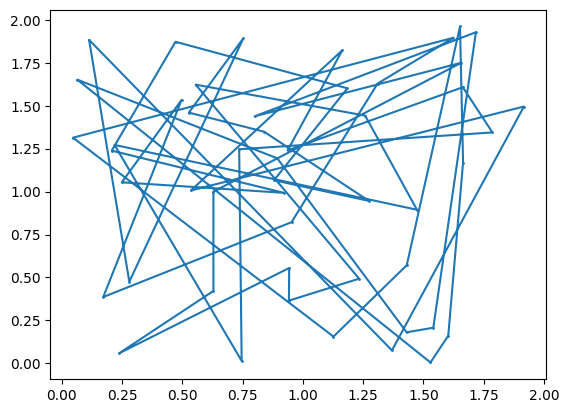

In [18]:
show_points(a)


In [19]:
tab1 = annealing(a, swap_arbitrary, exp_temp, 20, 0.999)


0.00000000316360623
Start distance: 46.69686755937144   Final distance: 15.487381742226226


In [498]:
tab2 = annealing(a, swap_consecutive, exp_temp, 1000, 0.999)


Start distance: 48.70320154572158   Final distance: 35.739913555303055


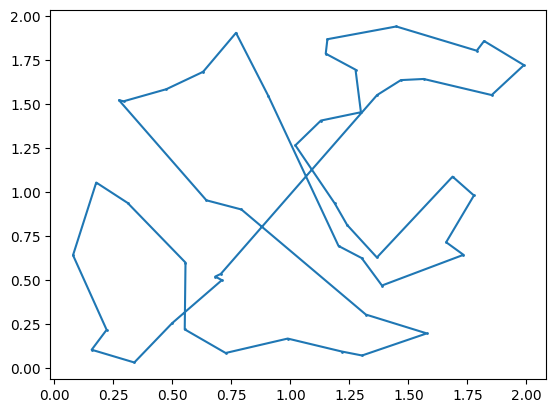

In [516]:
show_points(tab1[0])


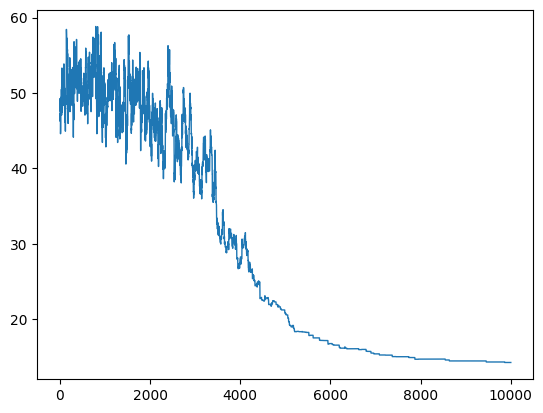

In [510]:
show_energy(tab1[1], 20)


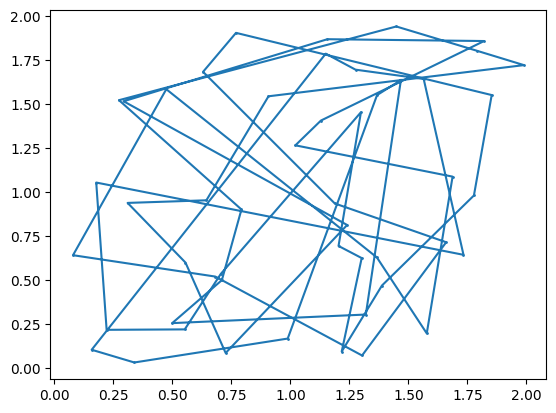

In [505]:
show_points(tab2[0])


### Zadanie 2

In [234]:
# maksymalizujemy energię
def two_right_two_left(matrix, coord):
    row, col = coord
    n = len(matrix)
    # print("row {} col {}".format(row, col))
    # print(matrix[row][(col + 1) % n],
    #     matrix[row ][(col + 2) % n],
    #     matrix[row][col - 1],
    #     matrix[row][col - 2],)
    return (
        (row, (col + 1) % n),
        (row, (col + 2) % n),
        (row, (col + 3) % n),
        (row, (col + 4) % n),
        (row, col - 1),
        (row, col - 2),
        (row, col - 3),
        (row, col - 4),
    )


def square(matrix, coord):
    row, col = coord
    n = len(matrix)
    return (
        ((row + 1) % n, (col + 1) % n),
        ((row) % n, (col + 1) % n),
        ((row - 1) % n, (col + 1) % n),
        ((row + 1) % n, (col) % n),
        ((row - 1) % n, (col) % n),
        ((row - 1) % n, (col - 1) % n),
        ((row) % n, (col - 1) % n),
        ((row + 1) % n, (col - 1) % n),
    )




class Energy:
    # everything if its going on an energy and the neighbourhood
    def __init__(self, func=lambda x: x**2, field_getter=None):
        self.func = func
        self.field_getter = field_getter

    def compute_energy(self, matrix, x):
        return self.func(self.sum_active_neighbours(matrix, x))

    def get_neighbours(self, matrix, x):
        return self.field_getter(matrix, x)

    def sum_active_neighbours(self, matrix, x):
        suma = 0
        neigh = self.get_neighbours(matrix, x)
        for i in neigh:
            if matrix[i] == 0: suma += 1
        return suma
    
        # neighbours = self.get_neighbours(matrix, x)
        # to_return  = sum(map(lambda cords: matrix[cords[0], cords[1]], neighbours))
        # return to_return

    def set_energy_func(self, func):
        self.func = func

    def set_field_getter(self, field_getter):
        self.field_getter = field_getter


class BinaryImage:
    def __init__(
        self,
        image: np.ndarray,
        energy_elem: Energy,
        temperature: float,
        max_iteration: int,
        alpha=0.99,
    ):
        self.image = np.copy(image)
        self.length = len(self.image)
        self.energy = energy_elem
        self.neighbour_matrix = None
        self.best_image = np.copy(image)
        self.temperature = temperature
        self.best_energy = None
        self.begin_energy = 0
        self.max_iteration = max_iteration
        self.plot_energy = []
        self.ALPHA = alpha

    # zwraca obliczoną energię dla zmienionych czarnych pól
    def compute_neighbour_matrix(self):
        neighbour = np.zeros((self.length, self.length))
        for x in range(self.length):
            for y in range(self.length):
                neighbour[x, y] = self.energy.sum_active_neighbours(self.image, (x, y))

        return neighbour

    def acceptance_probability(self, diff_cost):
        # return np.e ** (diff_cost / self.temperature)
        return np.e ** (diff_cost / self.temperature)

    def begining_energy(self):
        self.neighbour_matrix = self.compute_neighbour_matrix()
        for x in range(self.length):
            for y in range(self.length):
                self.begin_energy += self.energy.func(self.neighbour_matrix[x, y])
                # print(self.begin_energy, self.neighbour_matrix[x, y])
        self.best_energy = self.begin_energy

    def solve_image(self):
        curr_energy = self.best_energy
        self.plot_energy.append(curr_energy)
        cos = 0
        iteration_counter = 0
        solution_counter = 0
        max_same_solution = 100000
        

        while iteration_counter < self.max_iteration:
            # chose 2 elements from matrix
            # time.sleep(0.5)
            x, y = (np.random.choice(self.length), np.random.choice(self.length)), (
                np.random.choice(self.length),
                np.random.choice(self.length),
            )

            diff_cost = self.calculate_diff(x, y)
            rand_val = np.random.random()

            # if diff_cost > 0 or rand_val < self.acceptance_probability(diff_cost):
            #     # print(diff_cost, self.best_energy)
            #     # time.sleep(1)
            #     self.swap_matrix_elems(x, y)
            #     curr_energy -= diff_cost
            #     iteration_counter = 0

            # if self.best_energy > curr_energy:
            #     self.best_energy = curr_energy
            #     self.best_image = np.copy(self.image)

            # iteration_counter += 1
            # if -200000 > curr_energy :
            #     break
            witam = 0
            if diff_cost > 0:
                self.swap_matrix_elems(x, y)
                curr_energy -= diff_cost
                iteration_counter = 0
                # solution_counter = 0

            elif np.isclose(diff_cost, 0):
                self.swap_matrix_elems(x, y)
                iteration_counter += 1
                # solution_counter = 0

            else:
                witam = self.acceptance_probability(diff_cost)
                if rand_val < witam:
                    # print(arr)
                    self.swap_matrix_elems(x, y)
                    curr_energy -= diff_cost
                    solution_counter = 0
                    iteration_counter = 0
                    # time.sleep(0.5)
                else:
                    # solution_counter += 1
                    iteration_counter += 1

            if self.best_energy > curr_energy:
                self.best_energy = curr_energy
                self.best_image = np.copy(self.image)
            # solution_counter += 1
            self.plot_energy.append(curr_energy)
            self.temperature = self.temperature * self.ALPHA
            print(
                "{:.16f} {} prob {:.16f} data {}".format(
                    self.temperature,
                    curr_energy,
                    witam,
                    diff_cost
                ),
                end="\r",
            )
            # print("{:.16f}".format(iteration_counter), end="\r")

    def calculate_diff(self, x, y):
        # x - current position
        # y - future position
        if self.image[x] == self.image[y]:
            return 0

        fields1 = self.energy.get_neighbours(self.image, x)
        fields2 = self.energy.get_neighbours(self.image, y)

        fields = set(fields1 + fields2)
        fields1 = list(fields.difference(fields2))
        fields2 = list(fields.difference(fields1))

        result = 0
        # print("field1 and field2 {}".format(fields1 + fields2))

        for field in fields1 + fields2:
            # print("field {}".format(field))
            result += self.energy.compute_energy(self.neighbour_matrix, field)

        change_val = 1 if self.image[x] == 0 else -1
        # change_val = -1 if self.image[x] == 0 else 1

        after_change_result = 0
        for field in fields1:
            after_change_result += self.energy.compute_energy(
                self.neighbour_matrix + change_val, field
            )
        for field in fields2:
            after_change_result += self.energy.compute_energy(
                self.neighbour_matrix - change_val, field
            )

        # checking if x or y was in neighbours of each other
        if y in fields1:
            result += self.energy.func(self.neighbour_matrix[x]) + self.energy.func(
                self.neighbour_matrix[y]
            )
            after_change_result += self.energy.func(
                self.neighbour_matrix[x] + change_val
            ) + self.energy.func(self.neighbour_matrix[y] - change_val)

        return result - after_change_result

    def swap_matrix_elems(self, x, y):
        if self.image[x] == self.image[y]:
            return

        fields1 = self.energy.get_neighbours(self.image, x)
        fields2 = self.energy.get_neighbours(self.image, y)

        change_val = 1 if self.image[x] == 0 else -1

        for field in fields1:
            self.neighbour_matrix[field] += change_val
        for field in fields2:
            self.neighbour_matrix[field] -= change_val

        self.image[x], self.image[y] = self.image[y], self.image[x]

    def draw(self):
        ...


In [135]:
def showImg(n, matrix):
    fig, ax = plt.subplots(figsize=(n / INCH_TO_PIXEL + 5, n / INCH_TO_PIXEL + 5))
    print(matrix)
    plt.imshow(matrix, interpolation="nearest", vmin =0)
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.show()


In [193]:
def generate_binary(n=256, p=0.7, seed=100):
    A_1D = np.zeros((n*n))

    last_one_id = round(n*n*p)
    A_1D[:last_one_id] += 1

    np.random.seed(seed)
    np.random.shuffle(A_1D)

    A_2D = np.reshape(A_1D, (n,n))

    return A_2D

In [120]:

matrix_0_1 = np.random.choice((0, 1), (2, 2))

In [224]:
matrix_0_1 = generate_binary(100)

[[0. 0. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]]


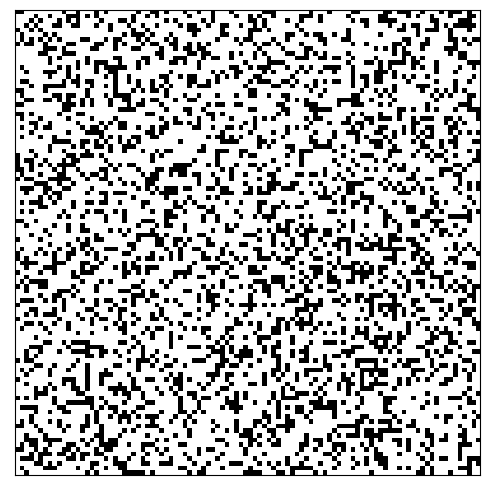

In [225]:
showImg(100, matrix_0_1)

In [238]:
energy_0_1 = Energy(field_getter=two_right_two_left)

In [239]:
image = BinaryImage(matrix_0_1, energy_0_1, 200, 10000)
image.begining_energy()

In [240]:
image.solve_image()

/tmp/ipykernel_14312/733203064.py:101: RuntimeWarning: overflow encountered in double_scalars
  return np.e ** (diff_cost / self.temperature)


[[1. 0. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]


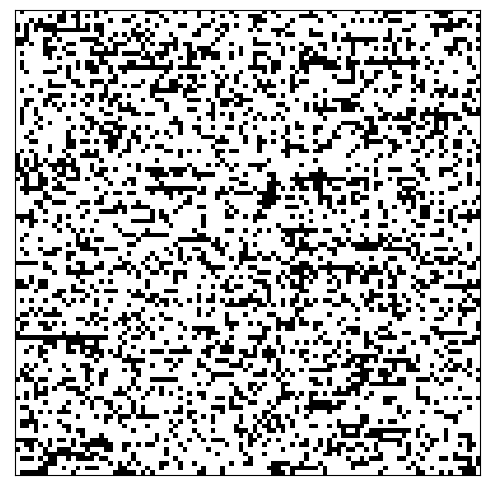

In [241]:
showImg(100, image.best_image)

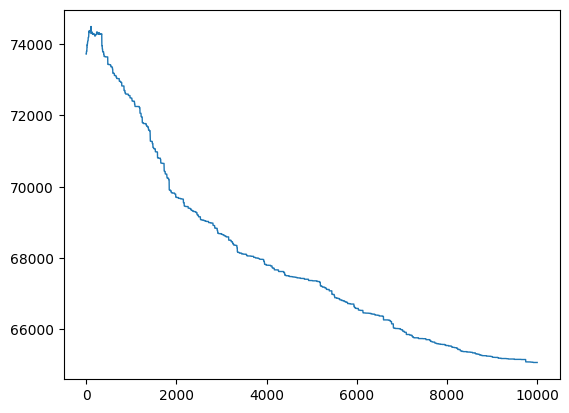

In [242]:
show_energy(image.plot_energy, 200)

In [185]:
energy_0_2 = Energy(field_getter=square)

In [243]:
image1 = BinaryImage(matrix_0_1, energy_0_2, 2000, 100000, 0.9999)
image1.begining_energy()

In [244]:
image1.solve_image()

KeyboardInterrupt: 

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]


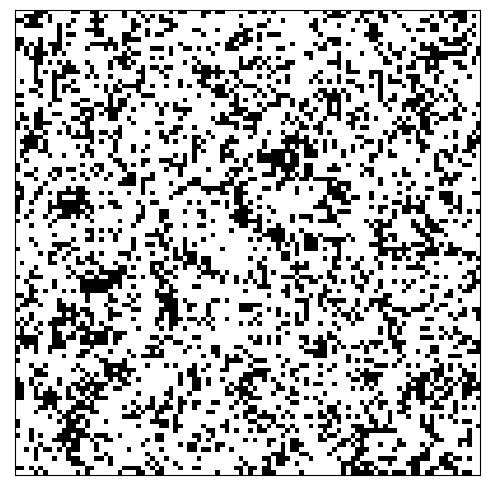

In [245]:
showImg(100, image1.best_image)


In [253]:
matrix_0_3 = generate_binary(100, p = 0.5)
image3 = BinaryImage(matrix_0_3, energy_0_2, 2000, 100000, 0.9999)
image3.begining_energy()

In [254]:
image3.solve_image()

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]]


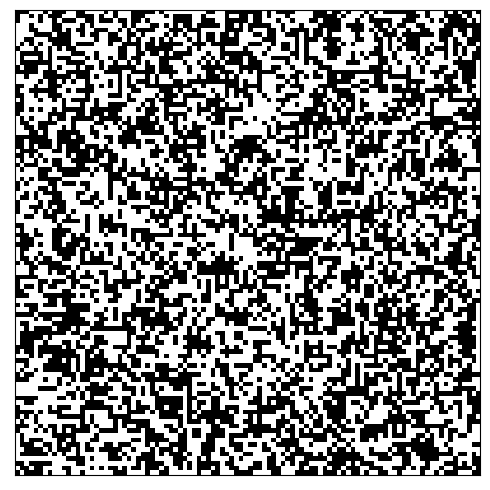

In [255]:
showImg(100, image3.image)


[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]


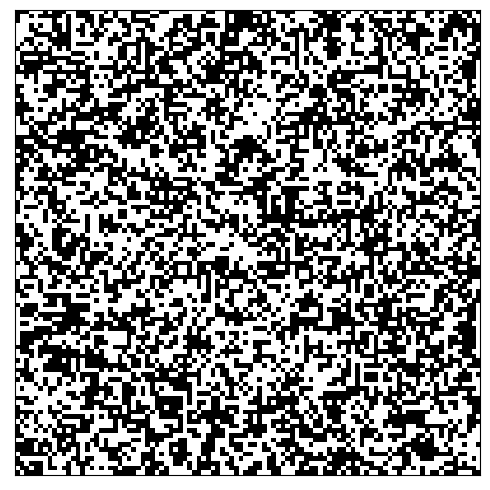

In [251]:
showImg(100, image3.best_image)
